In [1]:
%run 2_preprocessing.ipynb


In [2]:
import pickle

In [3]:
filename = 'sentiment_analysis_model.pkl'

# Load the saved model using pickle
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)


In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(model):
    # Get the vectorizer
    vectorizer = model.named_steps['vectorizer']

    # Get the feature names
    feature_names = vectorizer.get_feature_names()

    # Get the coefficients
    coef = model.named_steps['lr'].coef_[0]

    # Get the top 20 positive and negative words
    top_positive_words = [feature_names[i] for i in coef.argsort()[-20:]]
    top_negative_words = [feature_names[i] for i in coef.argsort()[:20]]

    # Create the wordclouds
    wordcloud_pos = WordCloud(width=800, height=400).generate(" ".join(top_positive_words))
    wordcloud_neg = WordCloud(width=800, height=400).generate(" ".join(top_negative_words))

    # Plot the wordclouds
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    ax1.imshow(wordcloud_pos)
    ax1.axis("off")
    ax1.set_title("Top 20 positive words", fontsize=20)
    ax2.imshow(wordcloud_neg)
    ax2.axis("off")
    ax2.set_title("Top 20 negative words", fontsize=20)
    plt.show()


c:\Users\LuisD\anaconda3\envs\dh\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


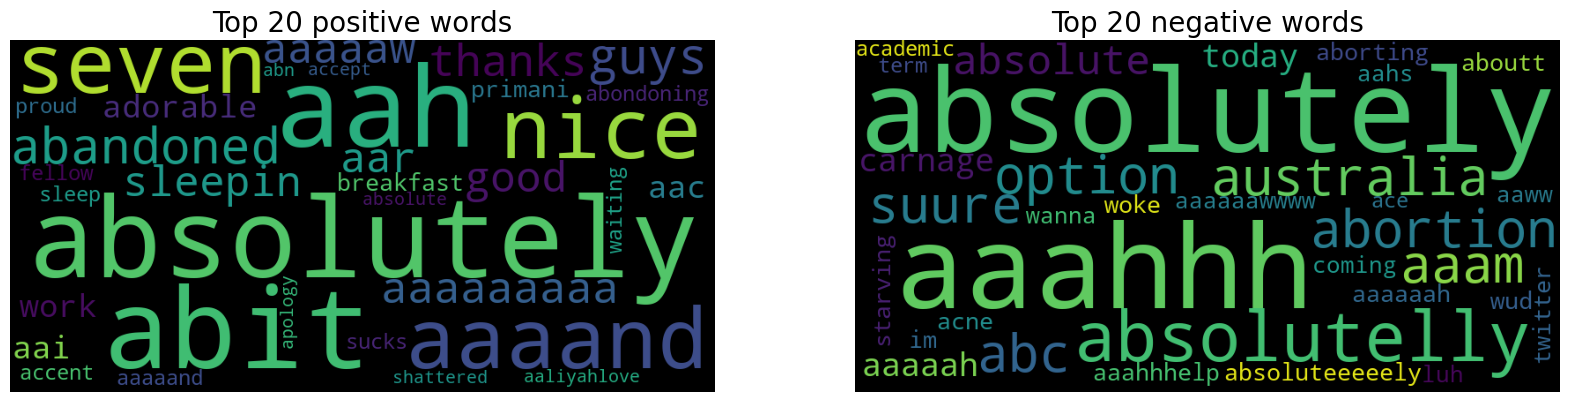

In [14]:
plot_wordcloud(loaded_model)

In [33]:
import pandas as pd

In [34]:
testStrings = ['I am so happy today', 'I am annoyed', 'I am indifferent', 'I am angry']


In [35]:
text = pd.Series(testStrings)
print(loaded_model.predict(text))

['positive' 'negative' 'positive' 'negative']


In [37]:
from flask import Flask, render_template, request

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    text = request.form['text']
    text = pd.Series(text)
    sentiment = loaded_model.predict(text)
    return render_template('result.html', sentiment=sentiment)

# Define the index route
@app.route('/')
def index():
    return render_template('index.html')

if __name__ == '__main__':
    app.run(port=5000)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


In [ ]:
# port fowarding
# ./ngrok http 5000
